In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import gensim
import os
import re

import nltk
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from collections import Counter
from wordcloud import WordCloud 
from textblob import TextBlob


from pylab import rcParams 
import warnings 
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

In [3]:
data=pd.read_csv('submission.csv')
data

,textID,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,exciting
2,eee518ae67,Recession
3,01082688c6,happy bday!
4,33987a8ee5,I like it!!
...,...,...
3529,e5f0e6ef4b,tired
3530,416863ce47,Thanks
3531,6332da480c,I know what you mean. My little dog is sinkin...
3532,df1baec676,I love your videos!


In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
data.shape

(3534, 2)

In [7]:
data.isnull().sum()

textID           0
selected_text    0
dtype: int64

In [8]:
#Polarity Checking 
def find_pol(review):
  return TextBlob(review).sentiment.polarity

data['sentiment_polarity'] = data['selected_text'].apply(find_pol)
data.head()

,textID,selected_text,sentiment_polarity
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,0.0
1,96d74cb729,exciting,0.3
2,eee518ae67,Recession,0.0
3,01082688c6,happy bday!,1.0
4,33987a8ee5,I like it!!,0.0


<AxesSubplot:xlabel='sentiment_polarity', ylabel='Density'>

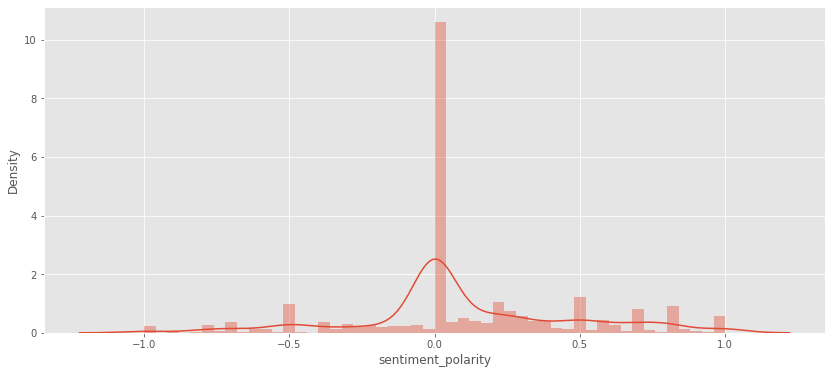

In [31]:
sns.distplot(data['sentiment_polarity'])

In [9]:
ps = PorterStemmer()

In [12]:
def clean_text(text):
    text = "".join([c for c in text if c in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word)for word in tokens if not word in stopwords.words('english')]
    return text

In [32]:
text

"Last session of the day  http://twitpic.com/67ezhexcitingRecession happy bday!I like it!!visitors!HATESblocked and within a short time of the last clue all of them What did you get?  My day is alright.. haven`t done anything yet. leaving soon to my stepsister though!My bike was put on hold...should have known that.... argh total bummer I checked.  We didn`t win .. and you`re on twitter! Did the tavern bore you that much?sad,I feel like my phones hole is not a virgin. That`s how loose it is... :`(hate Miss youCramps . . .niceI`m going into a spiritual stagnentation, its exploding my ego!. I now realise, i`m not all that great. and I`m ok with that.Stupid storm.My dead grandpa pays more attention to me than you dobad.about to go to sleeplamethats so coolhey peoples, dont you just hate being grounded haha, im just sat eating an apple and watching death note (some anime)Huh, another ScarePoint coding Sunday look who I found just for you  --->  http://twitter.com/DJT2009No AC, the fan does

In [76]:
corpus=[]

In [38]:
for i in range(0, len(data)):
    print(i)
    selectedtext = re.sub('[^a-zA-Z]',' ',data['selected_text'][i])
    selectedtext = selectedtext.lower()
    selectedtext=  selectedtext.split()
    
    selectedtext = [ps.stem(word)for word in selectedtext if not word in stopwords.words('english')]
    selectedtext= ' '.join(selectedtext)
    corpus.append(selectedtext)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
corpus

['last session day http twitpic com ezh',
 'excit',
 'recess',
 'happi bday',
 'like',
 'visitor',
 'hate',
 'block',
 'within short time last clue',
 'get day alright done anyth yet leav soon stepsist though',
 'bike put hold known argh total bummer',
 'check win',
 'twitter tavern bore much',
 'sad',
 'feel like phone hole virgin loos',
 'hate',
 'miss',
 'cramp',
 'nice',
 'go spiritu stagnent explod ego realis great ok',
 'stupid storm',
 'dead grandpa pay attent',
 'bad',
 'go sleep',
 'lame',
 'that cool',
 'hey peopl dont hate ground haha im sat eat appl watch death note anim',
 'huh anoth scarepoint code sunday',
 'look found http twitter com djt',
 'ac fan doesnt swing way sweat hot humid day',
 'guess depend want juri',
 'resort eat mickey ds alon',
 'faux gothi chick look sorri go camden like pop punk jimmi eat world',
 'ask twitter id sun sign',
 'go',
 'good film',
 'happi mother day mumm',
 'realli need put laptop start get readi shindig miss twitterlov day',
 'sorri',
 '

In [17]:
#creating BoW

bow_article = CountVectorizer().fit(corpus)

count_tokens = bow_article.get_feature_names()

article_vect = bow_article.transform(corpus)
count_tokens


['aa',
 'aaaaahhhh',
 'aah',
 'aarg',
 'abandon',
 'abbi',
 'abl',
 'absolut',
 'absout',
 'abt',
 'abus',
 'ac',
 'acc',
 'accept',
 'access',
 'accid',
 'accord',
 'account',
 'ace',
 'ach',
 'achi',
 'achiev',
 'ack',
 'acoust',
 'acronym',
 'across',
 'act',
 'action',
 'actual',
 'actuali',
 'acura',
 'ad',
 'adam',
 'adapt',
 'add',
 'addi',
 'addict',
 'address',
 'adel',
 'adieu',
 'adjust',
 'adob',
 'adopt',
 'ador',
 'adv',
 'adventur',
 'advert',
 'advertis',
 'advic',
 'advisori',
 'afarid',
 'afford',
 'afraid',
 'africa',
 'afternoon',
 'afterschool',
 'afterward',
 'age',
 'agenc',
 'aggress',
 'ago',
 'agre',
 'ah',
 'aha',
 'ahahahahahahahahah',
 'ahahha',
 'ahead',
 'ahh',
 'ahhahah',
 'ahhh',
 'ahhhh',
 'ahhhhh',
 'ahhhhhhh',
 'ahhhhhhhh',
 'ahi',
 'aida',
 'aikido',
 'aim',
 'aint',
 'air',
 'aircondit',
 'airport',
 'airshow',
 'aj',
 'aka',
 'al',
 'ala',
 'alabama',
 'alarm',
 'album',
 'alcohol',
 'aldi',
 'ale',
 'alen',
 'alexand',
 'ali',
 'alia',
 'alic',
 

In [18]:
df_count_vect=pd.DataFrame(data=article_vect.toarray(),columns=count_tokens)
df_count_vect


,aa,aaaaahhhh,aah,aarg,abandon,abbi,abl,absolut,absout,abt,...,yupz,yy,za,zack,zero,zimbabw,zombi,zoo,zr,zs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Word2Vec

In [19]:
selectedtext = data.selected_text.apply(gensim.utils.simple_preprocess)
selectedtext

0       [last, session, of, the, day, http, twitpic, c...
1                                              [exciting]
2                                             [recession]
3                                           [happy, bday]
4                                              [like, it]
                              ...                        
3529                                              [tired]
3530                                             [thanks]
3531    [know, what, you, mean, my, little, dog, is, s...
3532                                 [love, your, videos]
3533                                               [cute]
Name: selected_text, Length: 3534, dtype: object

In [20]:
model = gensim.models.Word2Vec(
        window=10,
        min_count=2,
        workers=4
)

In [21]:
model.build_vocab(selectedtext, progress_per=500)

In [22]:
model.epochs

5

In [23]:
model.corpus_count

3534

In [24]:
model.train(selectedtext, total_examples=model.corpus_count, epochs=5)

(88374, 130440)

In [25]:
model.save("./word2vec-nlp.model")

In [59]:
model.wv.most_similar("good")

[('but', 0.9995521903038025),
 ('the', 0.999489963054657),
 ('from', 0.9994850158691406),
 ('last', 0.9994814991950989),
 ('on', 0.9994792342185974),
 ('lol', 0.9994745850563049),
 ('is', 0.9994711875915527),
 ('have', 0.9994616508483887),
 ('in', 0.9994587302207947),
 ('and', 0.9994583129882812)]

Term Frequency-Inverse Document Frequency 

In [27]:
tfid=TfidfVectorizer()

In [28]:
corpus=data['selected_text']

In [29]:
x= tfid.fit(corpus)
print(x.vocabulary)
print(tfid.get_feature_names())

x=tfid.transform(corpus)
print(x.shape)
print(x)
print(x.toarray)

df=pd.DataFrame(x.toarray(), columns = tfid.get_feature_names())
print(df)

None
['00', '000', '06', '07kbp', '09', '0930', '0t2b6j', '0zr2jqj', '10', '100', '100th', '106', '10min', '11', '12', '120', '12am', '1330', '14', '140', '1401', '1473318', '15', '15th', '16', '1667', '167', '17', '18', '18th', '19', '1995', '1997', '1aa1rf', '1aida', '1hr', '1st', '20', '200', '2009', '2010', '20s', '20th', '21ds', '22', '220', '23rd', '24', '24th', '25', '250g', '25ft', '26th', '27', '2833', '29', '29th', '2d', '2day', '2ehfov', '2moro', '2morrow', '2mrw', '2nd', '2nite', '2uhs', '2w2v', '30', '300', '3000', '30am', '30pm', '31', '32', '320gb', '33', '333333333', '35', '360', '37', '38', '3breakupwords', '3d', '3gig', '3him', '3hrs', '3min', '3rd', '3yo', '40', '4000', '43', '45', '4719', '48hours', '4e', '4get', '4hap4', '4ja8r', '4jbwh', '4jco5', '4rom', '4th', '4u5h8', '4vw9a', '4w5eh', '4w67k', '4w9h2', '4wgoq', '4wgp2', '4wptj', '4wsmw', '4wtii', '4wu0a', '4wuaq', '4xvw2', '50', '500', '5000', '5000th', '51p', '530', '54', '550', '577', '59', '5am', '5jgio', '5

Word Frequencies

In [46]:
word_frequencies = {}
for word in nltk.word_tokenize(selectedtext):
    if word not in stop:
        if word not in word_frequencies:
            word_frequencies[word] = 1
        else:
            word_frequencies[word]+= 1

In [54]:
maximum_frequency = max(word_frequencies.values())

for word in word_frequencies:
    word_frequencies[word] = word_frequencies[word] / maximum_frequency

In [62]:
word_frequencies

{'cute': 1.0}

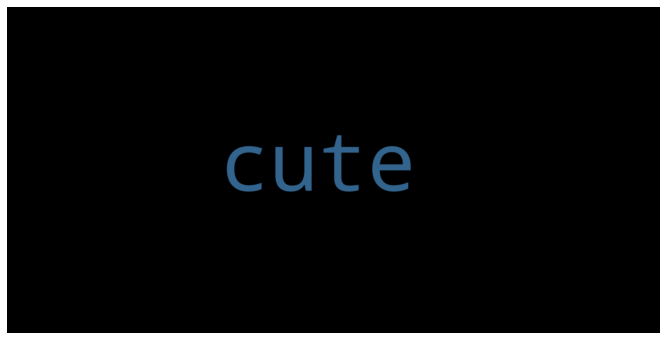

In [74]:
text=''.join(word_frequencies)
wordcloud = WordCloud(max_font_size=100,
                     max_words=120,
                     scale=10,
                     width=800,
                     height=400,
                     ).generate(text)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [55]:
words_scores = {}

for words in corpus:
    for word in nltk.word_tokenize(words):
        if word in word_frequencies and len(words.split(' ')) < 100:
            if words not in words_scores:
                words_scores[words] = word_frequencies[word]
            else:
                words_scores[words]+= word_frequencies[word]

In [61]:
words_scores

{'cute': 16.0,
 'cute pictur get fat lick bbq must found chop someon els': 2.0,
 'sad young love come end sooo cute togeth': 2.0,
 'watch wall e cute sad': 2.0,
 'home day scale one ten feel old compar haha cute': 2.0,
 'saw cute movi pass place call peasant kitchen wtf name kinda sad': 2.0,
 'aww bless haha cute tom': 2.0,
 'haha know sorri typo last tweet blehhh ps said sucha cute movi awww': 2.0,
 'awww holli she cute hope let sing': 2.0}

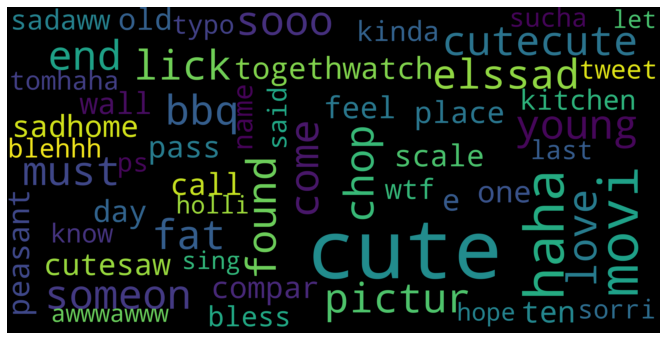

In [73]:
text=''.join(words_scores)
wordcloud = WordCloud(max_font_size=100,
                     max_words=120,
                     scale=10,
                     width=800,
                     height=400,
                     ).generate(text)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

Text Summarization

In [71]:
import heapq
summary = heapq.nlargest(10, words_scores, key=words_scores.get)

print(" ".join(summary))

cute cute pictur get fat lick bbq must found chop someon els sad young love come end sooo cute togeth watch wall e cute sad home day scale one ten feel old compar haha cute saw cute movi pass place call peasant kitchen wtf name kinda sad aww bless haha cute tom haha know sorri typo last tweet blehhh ps said sucha cute movi awww awww holli she cute hope let sing


Visualization

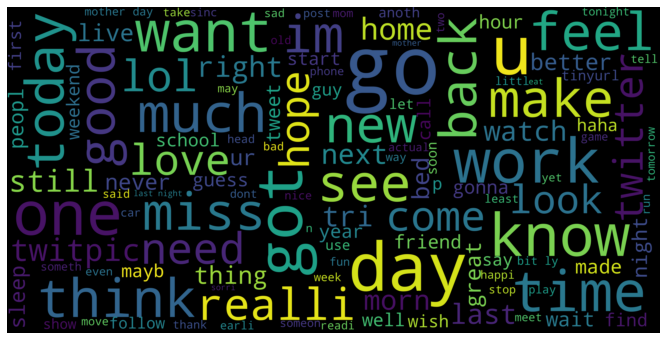

In [75]:
text=''.join(corpus)
wordcloud = WordCloud(max_font_size=100,
                     max_words=120,
                     scale=10,
                     width=800,
                     height=400,
                     ).generate(text)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()